<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="5"><b>Individual Assignment</b></font><center>
                <center><font size="6">Digital Innovations for Water Challenges</font><center></td>
			</tr>
			<tr>
                <td><center><font size="14">Brian Mbaabu</font><center></td>
			</tr>
			<tr>
                <td><center><font size="6"><b>Analysis of changes in Evapotranspiration in Central Province Kenya as a result of changes in Land use between 2013 and 2022</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='images/ihe-delft-institute_unesco_fc-lr.jpg'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Introduction](#introduction)
2. [Relevance of study](#relevance)
3. [Case study](#casestudy)
4. [Methodology](#methodology)
5. [Results](#results)
6. [Conclusion](#conclusion)
7. [Interactive Program](#program)

# 1. Introduction <a name='introduction'></a>

For this analysis, data on evapotranspiration (ET) and land use cover were collected for the years 2013 and 2022. The aim is to provide an overview of the changes that occurred in the area of interest, contributing to the observed increase in evapotranspiration. ET represents the loss of water from the soil through processes such as evaporation and transpiration from plants.

This dataset holds particular relevance to the water-food nexus, as it can play a crucial role in soil conservation practices and sustainable water management. The information derived can contribute significantly to understanding and addressing the challenges at the intersection of water and food resources. Furthermore, the data is valuable for climate modeling and weather predictions, aiding in the determination of regional and local weather patterns.

The case study focuses on Central Province, Kenya, for the years 2013 and 2022. This region serves as a microcosm for understanding how changes in land use and evapotranspiration may impact local ecosystems and water resources. The findings of this study are pertinent not only to the specific geographic area but also to broader applications in environmental science and resource management.

The insights gained from this analysis can inform strategies for sustainable agriculture, water conservation, and climate resilience, contributing to the broader goals of ensuring food security and environmental sustainability.
 - Data on evapotranspiration was sourced from [United States Geological Survey (USGS)](https://earlywarning.usgs.gov/fews/datadownloads/Continental%20Africa/Monthly%20ET%20Anomaly). 
 - Data on Land cover usage was sourced from [Food and Agricultural Organization of the United Nations](https://wapor.apps.fao.org/catalog/WAPOR_2/2/L2_LCC_A)
 
 # 2. Relevance of Case study <a name='relevance'></a>
The analysis conducted alongside the assessment of land changes over time offers valuable insights into the dynamic interactions between modifications in land cover. These modifications can stem from both natural factors, such as climate change, and human-induced changes, reflecting the combined impacts of anthropogenic activities. The results derived from these studies hold significance across various domains and can be instrumental in several aspects, including:
 * Irrigation Planning
 * Water resource management
 * Policy formation and implementation as it relates deforestation
 * Drought monitoring and resilience planning
 
 # 3. Case Study <a name='casestudy'></a>

<img src='Central_Kenya.PNG' width = '300' height='200'>

Central province area of Kenya was a region in central Kenya that covered approximately 11,499km2 located to the north of Nairobi. Central Province is one of the regions in Kenya that receives favourable rainfall and is generallly cooler than the rest of Kenya due to its high altitude. The province plays a pivotal role in Kenya's agricultural landscape, being a significant producer of coffee. Coffee is among Kenya's largest agricultural exports, and Central Province's favorable climate and altitude contribute to the cultivation of high-quality coffee beans. 
 
Agriculture remains a key contributor to Kenya's GDP. A detailed analysis on the evapotranspiration data from the the regoin can help improve farming practices by giving detailed information on the soil quality, water management practices and the effects urbanization or deforestation may have on the regional climate due to its effects on et.
 


In [1]:
#Importing necessary libraries
import geopandas as gpd
import rioxarray as rio
import xarray as xr
import fiona
import cartopy.crs as ccrs
import wget
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 4. Methodology <a name='methodolgy'></a>

The notebook consists of an arrangement of functions all defined to perform specific tasks:

1. [Loading datasets](#datasets)

Accessing the directory of the data files and loading them into different variables:

<b3> a.) Accessing the shapefile for the region of interest </b3>
* c - shapefile of the casestudy
    
<b3> b.) Accessing the evapotranspiration data for the years 2013 and 2022 </b3>
* rio_et_2013 - evapotranspiration data for the year 2013 in the region of interest
* rio_et_2022 - evapotranspiration data for the year 2022 in the region of interest
    
<b3> c.) Accessing the land cover classification for the years 2013 and 2022 </b3>
* l_13 - land cover types identified in the region of interest for the year 2013
* l_22 - land cover types identified in the region of interest for the year 2022


2. [Calling the functions and plotting the data](#calling)


Assigning all the processed data into variables and defining the plot results function to visualize the land cover classification and evapotranspiration for both years.
A final plot is displayed to show changes in et and lcc during the time period

3.[Final conclusion]
Final conclusions of the result are drawn with a brief assessment of the differences between the two plots and the observations made. 

### a. Loading Datasets <a name='datasets'></a>

The datasets are loaded by a series of functions each designed to acquire the necessary data. This include:

* region_of_interest() - loads the Central Kenya (roi) shapefile from the data folder using the fiona library
* get_et(c) - downloads and unzips et data for the years 2013 and 2022
* get_lcc(c) - due to the nature of the acquisition of the dataset, this function only loads the lcc data for the years 2013 and 2022 already predownloaded.
* land_cover_area(lca_dict, data) - Calculating the total land cover classification identified in the region

In [2]:
#Defining region_of_interest function that opens the shapefile of central Kenya obtained from gadm

def region_of_interest():
    #Defining the path to the shapefile
    roi = r'./data/Central.shp'
    
    c = fiona.open(roi, crs = 'epsg:4326')
    
    return c



In [3]:
def unzip_file(file, extract_path):
    with zipfile.ZipFile(file, 'r') as zf:
        zf.extractall(extract_path)


def get_et(c):    
    """
    Function to open and process two raster datasets that show evapotranspiration in Africa
    for the years 2013 and 2022.
    
    Parameters:
    - (c): The area of study
    
    Returns
    - rio_et_2013: Raster dataset for ET values in the year 2013
    - rio_et_2022: Raster dataset for ET values in the year 2022
    
    The for loop iterates over the datasets, opening and processing the raster fules by checking
    they correspond to a specific year and subsequently checking for -9999 raster values that are
    treated as no data and masked using the 'where' function.
    """
    #Create a list of the two datasets
    datasets = ['y2013_viirsSSEBopETv6_actual_mm.tif', 'y2022_viirsSSEBopETv6_actual_mm.tif']
    rio_et_2013 = None
    rio_et_2022 = None
    
    for data in datasets:
        
        if '2013' in data:
            
            link = f'https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/fews/web/africa/yearly/etav6/downloads/yearly/y2013.zip'
            
            fout = wget.download(link)
            
            extract_path = r'./data'
            unzip_file(fout, extract_path)
            
            et = f'./data/{data}'
           
            t_2013 = rio.open_rasterio(et)
            t_2013 = t_2013.where(t_2013 != -9999)
            
            rio_et_2013 = t_2013.rio.clip_box(c.bounds[0], c.bounds[1], c.bounds[2], c.bounds[3])
            
        else:
            
            link = f'https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/fews/web/africa/yearly/etav6/downloads/yearly/y2022.zip'
            
            fout = wget.download(link)
            
            extract_path = r'./data'
            unzip_file(fout, extract_path)
            
            et = f'./data/{data}'
        
            t_2022 = rio.open_rasterio(et)
            t_2022 = t_2022.where(t_2022 != -9999)
            
            rio_et_2022 = t_2022.rio.clip_box(c.bounds[0], c.bounds[1], c.bounds[2], c.bounds[3])
            
    return rio_et_2013, rio_et_2022


In [4]:
def get_lcc(c):
    """
    Function to open the land cover classification raster files for the years 2013 and 2012.
    
    Parameters
    -  (c): The area of study
    
    Returns
    - l_13 - land cover of the area of study 2013
    - l_22 - land cover of the area of study 2022
    
    """
    l_13 = None
    l_22 = None
    
    datasets = ['L2_KEN_LCC_13.tif', 'L2_KEN_LCC_22.tif']
    
    for data in datasets:
        
        #Checking the filename to determin corresponding years
        if data.find('13') >= 1:
            lc = f'./data/{data}'
            lcc_1 = rio.open_rasterio(lc)
            lcc_1 = lcc_1.squeeze(dim='band', drop = True)
            lcc_1 = lcc_1.rio.write_crs('epsg:4326', inplace=True)
            lcc_1 = lcc_1.rename({'x': 'longitude', 'y': 'latitude'})
            
            l_13 = lcc_1.rio.clip_box(c.bounds[0], c.bounds[1], c.bounds[2], c.bounds[3])
            
        else:
            lc = f'./data/{data}'
            lcc_2 = rio.open_rasterio(lc)
            lcc_2 = lcc_2.squeeze(dim='band', drop = True)
            lcc_2 = lcc_2.rio.write_crs('epsg:4326', inplace=True)
            lcc_2 = lcc_2.rename({'x': 'longitude', 'y': 'latitude'})
            
            l_22 = lcc_2.rio.clip_box(c.bounds[0], c.bounds[1], c.bounds[2], c.bounds[3])
            
    return l_13, l_22

In [5]:
# Defining a dictionary that lists the classification of different land types as determined by FAO
lca_dict = {
                0: 'No data',
                20:	 'Shrubland',
                30:	 'Grassland', 
                41:	 'Cropland, rainfed',
                42:	 'Cropland, irrigated', 
                43:	 'Cropland, fallow', 
                50:	 'Built-up', 
                60:	 'Bare/sparse vegetation', 
                70:	 'Permanent  snow/ice', 
                80:	 'Water bodies', 
                81:	 'Temporary water bodies', 
                90:	 'Shrub, flooded', 
                111: 'Tree: closed, evergreen needle-leaved', 
                112: 'Tree: closed, evergreen broadleaved', 
                114: 'Tree: closed, deciduous broadleaved', 
                115: 'Tree: closed, mixed type', 
                116: 'Tree: closed, unknown type', 
                121: 'Tree: open, evergreen needle-leaved', 
                122: 'Tree: open, evergreen broadleaved', 
                123: 'Tree: open, deciduous needle-leaved', 
                124: 'Tree: open, deciduous broadleaved', 
                125: 'Tree: open, mixed type',
                126: 'Tree: open, unknown type', 
                200: 'Sea water'
             }
    
#lca_dict    

In [6]:
def land_cover_area(lca_dict, data):
    """
    Function that filters the lcc in the data and calculates the total
    land cover using the sum function.
    
    Paremeters
    - lca_dict : dictionary with the keys responding to the LCU code
    and the values being the land classes
    - data : raster file of the region of interest for a particular 
    year
    
    Results:
    
    df - dataframe showing all land cover types, their corresponding LCU 
    codes and descriptions
    """
    
    lcc_unq = np.unique(data.values[~np.isnan(data.values)])
    new_lca_dict = {k: lca_dict[k] for k in lcc_unq if k in lca_dict}
    
    lca_lst=[] 
    
    #looping through lcc and calculating sum of different land cover types
    for code in new_lca_dict.keys():
        code=float(code)

        #Determine the land cover area for each class 
        ds_lca = data.where(data==code, drop=True).sum()
        code_lca = ds_lca.values.tolist()
        lca_lst.append(code_lca)
        
        # change dict values to list
    lca_values = list(new_lca_dict.values())

    # change keys to list
    lca_keys = list(new_lca_dict)
    
    lca_data = {'LU Code':lca_keys,'Land Cover Class Description':lca_values,
        'Total Land Cover Area':lca_lst}
    
    
    df=pd.DataFrame(lca_data)
    df = df.sort_values('Total Land Cover Area', ascending=False)
        
    return df

### b. Calling Functions and Plotting the data <a name='calling'></a>
Having specified the functions, the following steps assign the outputs to variables that can be used for plottiong:

* c = region of interest
* rio_et_2013, rio_et_2013 - et data for the years 2013 and 2022 bounded to the region of interest
* l_13, l_22 - land cover classification for the years 2013 and 2022

In [7]:
c = region_of_interest()

c.bounds

(36.201116, -1.314701, 37.495161, 0.139153)

In [8]:
rio_et_2013, rio_et_2022 = get_et(c)

100% [........................................................................] 46470212 / 46470212

In [9]:
l_13, l_22 = get_lcc(c)

In [10]:
def plot_results(et_data, lcc_data):
    """
    The function plots the et data and land cover classification areas for the roi (Central Province)
    
    Parameters:
    - et_data - evapotranspiration raster file for a specific year
    - lcc_data - land cover classification area for a specific year
    
    Returns
    - Horizontal bar plot showing total area (units) for each land classification and the percantage it covers
    of the area
    - Map showing the et in the area for the year
    """
    path = r'./data/Central.shp'

    inc = gpd.read_file(path, crs = 'epsg:4326')
    
    total = lcc_data['Total Land Cover Area'].sum()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    lcc_data = lcc_data.sort_values('Total Land Cover Area')
    bars = ax1.barh(lcc_data['Land Cover Class Description'], lcc_data['Total Land Cover Area'])
    ax1.set_title('Land cover in Central Province')

    for idx, bar in zip(lcc_data.index, bars):
        pct_string = '{:0.1f}%'.format(np.round((lcc_data['Total Land Cover Area'][idx] / total)*100, 2))
        ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, pct_string, ha='left', va='center')

    ax2 = fig.add_subplot(122, projection = ccrs.PlateCarree(central_longitude = 0))
    ax2.set_xlabel('lon')
    ax2.set_ylabel('lat')
    et_data.plot(ax=ax2, transform = ccrs.PlateCarree(), cmap = 'viridis', cbar_kwargs = {'label': 'Evapotranspiration (mm)'})
    inc.boundary.plot(ax=ax2, facecolor = 'none', edgecolor = 'k')
    
    plt.tight_layout()
    plt.show()

In [11]:
#Calculating the land cover area for the roi in the year 2013

lca_2013 = land_cover_area(lca_dict, l_13)

lca_2013

,LU Code,Land Cover Class Description,Total Land Cover Area
2,41,"Cropland, rainfed",39356312.0
10,112,"Tree: closed, evergreen broadleaved",24980368.0
15,126,"Tree: open, unknown type",19149606.0
3,42,"Cropland, irrigated",5895918.0
12,116,"Tree: closed, unknown type",5094256.0
0,20,Shrubland,4806960.0
1,30,Grassland,2279190.0
5,50,Built-up,1997200.0
8,80,Water bodies,1352000.0
11,114,"Tree: closed, deciduous broadleaved",1299372.0


In [12]:
#Calculating the land cover area for the roi in the year 2022

lca_2022 = land_cover_area(lca_dict, l_22)

lca_2022


,LU Code,Land Cover Class Description,Total Land Cover Area
2,41,"Cropland, rainfed",38474120.0
10,112,"Tree: closed, evergreen broadleaved",24980368.0
15,126,"Tree: open, unknown type",19149606.0
3,42,"Cropland, irrigated",6798498.0
12,116,"Tree: closed, unknown type",5094256.0
0,20,Shrubland,4806960.0
1,30,Grassland,2279190.0
5,50,Built-up,1997200.0
8,80,Water bodies,1352000.0
11,114,"Tree: closed, deciduous broadleaved",1299372.0


### c. Plotting data for both 2013 and 2022
Plotting the data showing distribution of land cover classification in the area and the the annual evapotranspiration data

#### 2013

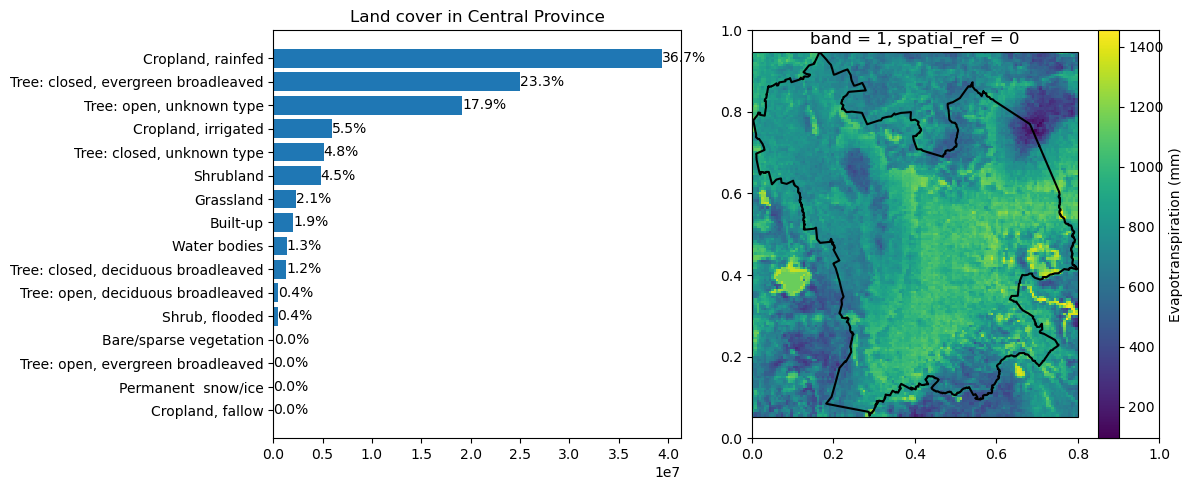

In [13]:
plot_results(rio_et_2013, lca_2013)

#### 2022

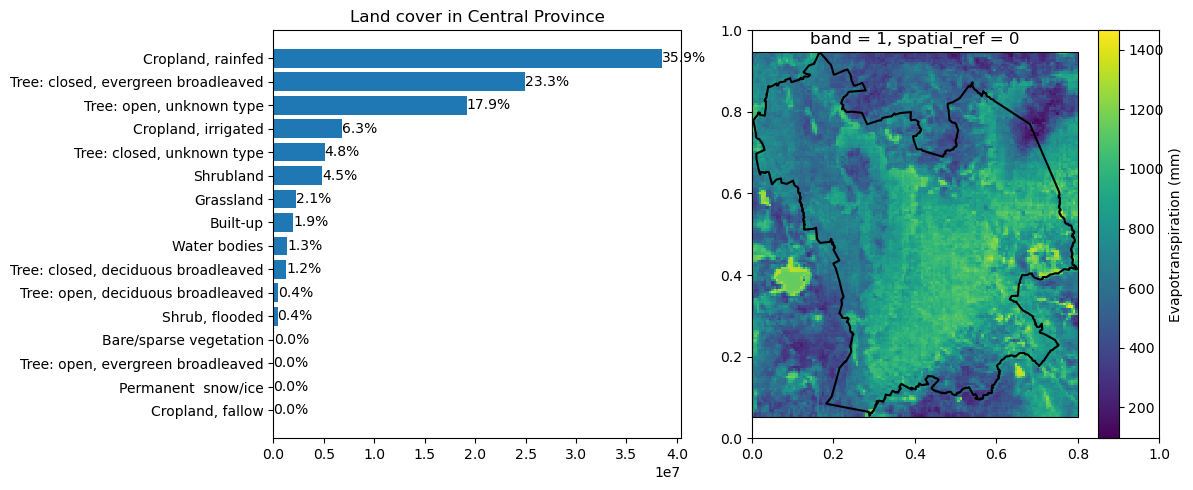

In [14]:
plot_results(rio_et_2022, lca_2022)

#### Difference in ET between the two years

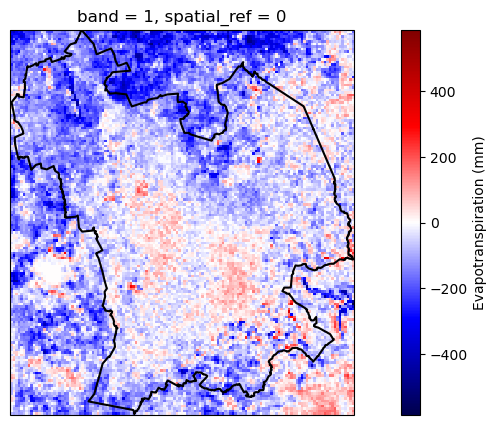

In [15]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

difference = rio_et_2022 - rio_et_2013

path = r'./data/Central.shp'

inc = gpd.read_file(path, crs = 'epsg:4326')

fig = plt.figure(figsize=(12, 5))
    
ax = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude = 0))
ax.set_xlabel('lon')
ax.set_ylabel('lat')
difference.plot(ax=ax, transform = ccrs.PlateCarree(), cmap = 'seismic', cbar_kwargs = {'label': 'Evapotranspiration (mm)'})
inc.boundary.plot(ax=ax, facecolor = 'none', edgecolor = 'k')

#plt.savefig(os.path.join(r'./output/ET_difference_central.png'), bbox_inches='tight', dpi=600)
plt.show()

#### Determining the changes in Land cover between the two years

Creating a copy of the lca_2022 df and creating a new column ('Change in Land Cover') that is a subtraction of the Total land Cover Area for 2022 and 2013 

In [16]:
#d2 = lca_2022 - lca_2013
new_df = lca_2022.copy()

new_df['Total Land Cover Area 2013'] = lca_2013['Total Land Cover Area']

new_df['Change in Land cover'] = lca_2022['Total Land Cover Area'] - lca_2013['Total Land Cover Area']

new_df = new_df.rename(columns = {'Total Land Cover Area' : 'Total Land Cover Area 2022'})

new_df

,LU Code,Land Cover Class Description,Total Land Cover Area 2022,Total Land Cover Area 2013,Change in Land cover
2,41,"Cropland, rainfed",38474120.0,39356312.0,-882192.0
10,112,"Tree: closed, evergreen broadleaved",24980368.0,24980368.0,0.0
15,126,"Tree: open, unknown type",19149606.0,19149606.0,0.0
3,42,"Cropland, irrigated",6798498.0,5895918.0,902580.0
12,116,"Tree: closed, unknown type",5094256.0,5094256.0,0.0
0,20,Shrubland,4806960.0,4806960.0,0.0
1,30,Grassland,2279190.0,2279190.0,0.0
5,50,Built-up,1997200.0,1997200.0,0.0
8,80,Water bodies,1352000.0,1352000.0,0.0
11,114,"Tree: closed, deciduous broadleaved",1299372.0,1299372.0,0.0


C:\Users\bmb001\AppData\Local\Temp\ipykernel_2332\2944402858.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_df['Land Cover Class Description'].values, rotation=90, ha='right')


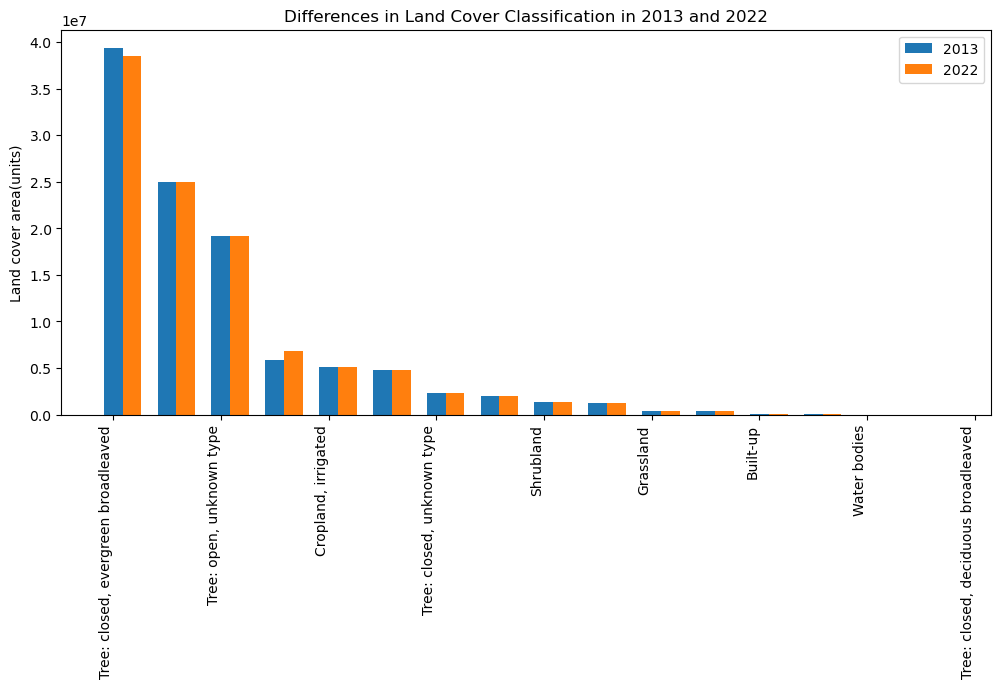

In [17]:
#Plotting each land cover classification for both years side by side

index = np.arange(new_df.shape[0])

fig, ax = plt.subplots(figsize=(12, 5))

bar_width = 0.35

bar1 = ax.bar(index, new_df['Total Land Cover Area 2013'],bar_width, label = '2013')
bar2 = ax.bar(index+bar_width, new_df['Total Land Cover Area 2022'], bar_width, label = '2022')

ax.set_xticklabels(new_df['Land Cover Class Description'].values, rotation=90, ha='right')
ax.set_ylabel('Land cover area(units)')
ax.legend()
plt.title('Differences in Land Cover Classification in 2013 and 2022')

plt.show()
#['Total Land Cover Area 2022', 'Total Land Cover Area 2013'], x ='LU Code')

# 4. Results <a name='results'></a>

Central Kenya, characterized as one of the more fertile regions of the country, undergoes notable changes in evapotranspiration, land cover, and agricultural practices. Some key observations from the study include:

## a. Evapotranspiration Patterns

While the central area of the region maintains relatively stable evapotranspiration levels, there is a discernible decrease in evapotranspiration along the boundaries in 2022 compared to 2013. 

## b. Land Cover Changes

A deeper look into the Land cover area provides insights into the changes in evapotranspiration. Of the 16 land cover types identified in the region, 3 showed significant differences:
* Cropland, rainfed - -882192.0
* Cropland, irrigated - +902580.0
* Cropland, fallow - +1161.0

## c. Agricultural practices

The differences in rainfed and irrigated cropland suggest a change to irrigation practices in the region that is in line with a prolonged drought period that affected the area during the duration of the case study. This suggests farmers are investing in irrigation practices to secure water resources. The agricultural communities are adapting to changing climatic conditions by modifying their land use and water management practices.

## d. Water Resources Implications
Increased irrigation in the region puts pressure on water sources and alters its availability for other uses. Mt. Kenya, the largest mountain in the country and one of the five water towers of Kenya is located in the study area and remains a significant water source for the country. Sensitization on proper irrigation practices will be essential in minimizing contamination of water and changes in groundwater.

The results of the analysis show that the area of study has:
* Got dryer between the years 2013 and 2022
* Been a significant water consumer.
* Seen an expansion in its agricultural area

<img src="./output/ET_difference_central.png" style="width:50%">

# 5. Conclusion <a name='conclusion'></a>

The analysis of the case study was restricted by the available evapotranspiration data on the region but despite the short period, the effects of climate change are apparent. An increase in irrigation in the area shows the importance of the region as a crop producer and the proactive steps taken to adapt to changes in climate and enhancing water use efficiency.

These results can contribute to solving water challenges in:
* Groundwater management - Sustainable groundwater use is essential to maintain water balance with unpredictable rains affecting recharge of underground reservoirs. An increase in irrigation practices underscores the importance of monitoring and managing aquifers.

* Policy implementation - The findings can contribute to policy formation as they can be used to support sustainable agricultural practices and the importance of water conservation.

* Case study - The findings can contribute to ongoing research as a case study to determine the effects progression to irrigation practices have on food production, land usage and soil quality in other areas around the world.

* Early warning system for water scarcity - Water authorities can use the above findings to assess the state of water resources in the region and identify potential water scaricity.

* Crop selection - Insights from this study can aid in the recommendation of crop selection towards less water requiring crops to ease the pressure on water resources.



# 6. Interactive Program <a name='program'></a>

Below is an interactive program that allows you to specify the temporal boundaries for the analysis of the evapotranspiration data and plots:
* evapotranspiration data for the starting date
* evapotranspiration data for the end date
* difference between the two dates

In [19]:
import wget
import zipfile

class et_analysis:
    def __init__(self):
        
        print('This program allows you to select the temporal boundaries for the above case study')
        print('\nDue to data restrictions, this is only possible between the years 2013 and 2022.')
        print('\nPlease specify the time boundaries below by inputing an integer between 13 and 22:')
        
        while True:
            self.start = input('\nSpecify your starting date. Year:')
            self.end = input(('\nSpecify your end date. Year:'))

            if int(self.end) <= int(self.start):
                print('The starting date cannot be larger or equal to the end date. Please try again: ')

            elif int(self.start) not in range(13, 23) or int(self.end) not in range(13, 23):
                print('Due to data restrictions, the integer value cannot be less than 13 or greater than 22.\
                \n Please try again: ')
            else:
                break

            
    def data_acquisition(self, c):
        
        dates = [self.start, self.end]
        raster_files = []
        
        for date in dates:

            value = int(date)
            link = f'https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/fews/web/africa/yearly/etav6/downloads/yearly/y20{value}.zip'
            
            fout = wget.download(link)

            extract_path = './output'

            unzip_file(fout, extract_path)

            data = f'y20{value}_viirsSSEBopETv6_actual_mm.tif'

            et_path = f'./output/{data}'

            et_1 = rio.open_rasterio(et_path)

            et_1 = et_1.where(et_1 != -9999)

            rio_et_1 = et_1.rio.clip_box(c.bounds[0], c.bounds[1], c.bounds[2], c.bounds[3])

            raster_files.append(rio_et_1)
                
        return tuple(raster_files)

In [20]:
et_analysis = et_analysis()
rio_1, rio_2 = et_analysis.data_acquisition(c)

This program allows you to select the temporal boundaries for the above case study

Due to data restrictions, this is only possible between the years 2013 and 2022.

Please specify the time boundaries below by inputing an integer between 13 and 22:



Specify your starting date. Year: 14

Specify your end date. Year: 18


100% [........................................................................] 46825778 / 46825778

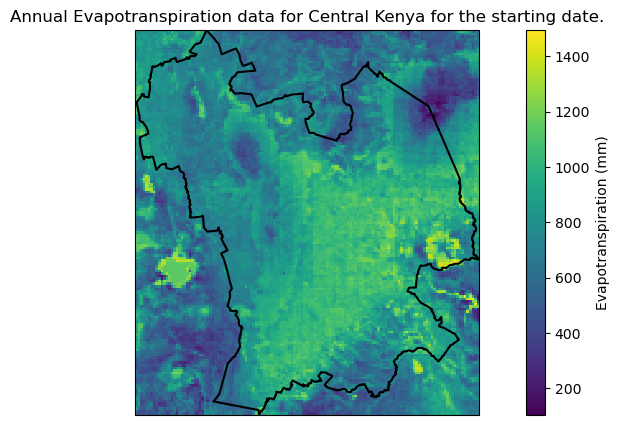

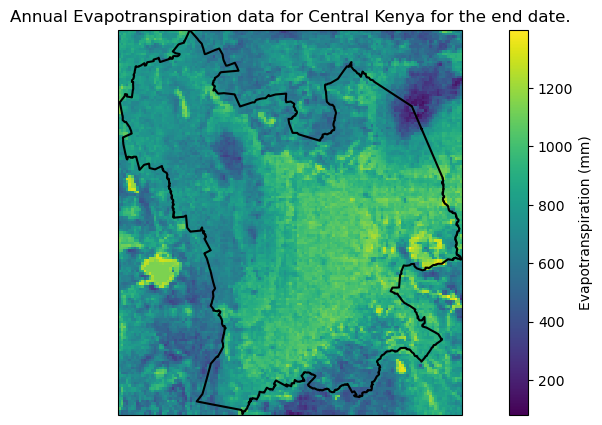

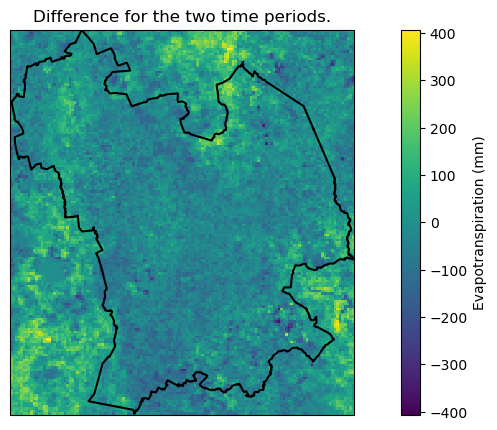

In [21]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
difference = rio_2 - rio_1
rasters = [rio_1, rio_2, difference]
path = r'./data/Central.shp'
for idx, rio in enumerate(rasters):
    inc = gpd.read_file(path, crs = 'epsg:4326')
    fig = plt.figure(figsize = (12,5))
    ax1 = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude = 0))
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    rio.plot(ax=ax1, transform = ccrs.PlateCarree(), cmap = 'viridis', cbar_kwargs = {'label': 'Evapotranspiration (mm)'})
    inc.boundary.plot(ax=ax1, facecolor = 'none', edgecolor = 'k')
    
    if idx == 0:
        plt.title('Annual Evapotranspiration data for Central Kenya for the starting date.')
        
    elif idx == 1:
        plt.title('Annual Evapotranspiration data for Central Kenya for the end date.')
        
    else:
        plt.title('Difference for the two time periods.')
        
    plt.show()